In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs


In [3]:
# reading the dataset
df=pd.read_csv("bank (2).csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
# Generate a synthetic dataset with 3-4 clusters
n_samples = 300
n_features = 2
n_clusters = 3
data, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, cluster_std=0.6, random_state=0)

C:\Users\Muralikrishna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Muralikrishna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Muralikrishna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Muralikrishna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

ValueError: num must be an integer with 1 <= num <= 3, not 4

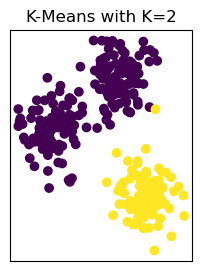

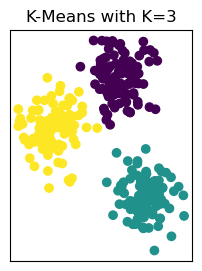

<Figure size 800x300 with 0 Axes>

In [11]:
# Implement K-Means clustering algorithm on the generated dataset with varying values of K
k_values = [2, 3,4]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    
    # Visualize the resulting clusters using Matplotlib
    plt.figure(figsize=(8, 3))
    plt.subplot(1, len(k_values), k)
    plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.title(f'K-Means with K={k}')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [12]:
# Evaluate the K-Means model using Silhouette score and determine the optimal number of clusters
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(score)

optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_k}')

C:\Users\Muralikrishna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Muralikrishna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Muralikrishna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Muralikrishna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

Optimal number of clusters: 3


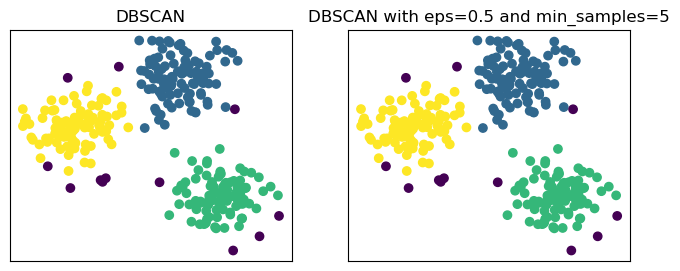

In [13]:
# Implement DBSCAN clustering algorithm on the same dataset and visualize the resulting clusters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data)

# Visualize the resulting clusters using Matplotlib
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN with eps=0.5 and min_samples=5')
plt.xticks([])
plt.yticks([])
plt.show()


In [14]:
# Experiment with different values of hyperparameters, i.e., eps and min_samples, and observe their effect on the resulting clusters
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data)
        
        plt.figure(figsize=(8, 3))
        plt.subplot(1, len(eps_values), eps)
        plt.scatter(data[:, 0], data[:, 1], c=dbscan.labels_, cmap='viridis')
        plt.title(f'DBSCAN with eps={eps} and min_samples={min_samples}')
        plt.xticks([])
        plt.yticks([])
plt.show()

ValueError: num must be an integer with 1 <= num <= 3, not 0.3

<Figure size 800x300 with 0 Axes>